In [1]:
import requests
from bs4 import BeautifulSoup
import spacy
from wayback import WaybackClient
import spacy

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
nlp = spacy.load('es_core_news_sm')

def buscar(url):
    client = WaybackClient() # instanciamos el cliente
    results = client.search(url) # la pagina que queremos ver
    lista = []
    for pagina in results:
        lista.append([pagina.view_url,pagina.timestamp])       
    return lista

def obtener_html(url):
    web = requests.get(url) # va a tomar la ultima url que vimos antes
    html = web.content#.decode() #aca obtenemos el HTML de la URL
    soup = BeautifulSoup(html, 'html.parser')
    a = soup.find_all('p')
    cadena = ""
    for b in a:
        cadena +=" "+ b.text  
    return cadena

def nube(texto):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(texto)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

def limpiar(texto):
    lex = []
    doc=nlp(texto)
    for t in doc:
        if   (not t.is_punct and 
             not t.is_stop):
            lex.append(t.orth_)
    palabras = []
    for t in doc:
        if len(t)>= 3 and t.text.isalpha():
            palabras.append(t.text.lower())
    return palabras

def contar(palabras):
    word_count={}
    #print(palabras)
    for palabra in palabras:
        if palabra in word_count.keys():
            word_count[palabra][0]+=1
        else:
            word_count[palabra]=[1]

    #print(word_count)

    #Convertimos el diccionario en un pandas DataFrame para ordernarlo:
    
    try:
        df = pd.DataFrame.from_dict(word_count).transpose()
        df.columns=["freq"]
        df.sort_values(["freq"], ascending=False, inplace=True)
        print(df.head(3))
    except:
        print("error")
    

               freq
los               9
neurociencias     8
taller            6
               freq
los               9
neurociencias     8
taller            6
               freq
los               9
neurociencias     8
taller            6
               freq
los               9
neurociencias     8
taller            6
               freq
los               9
neurociencias     8
taller            6
               freq
los               9
neurociencias     8
taller            6
               freq
los               9
neurociencias     7
las               6
               freq
los               9
neurociencias     7
las               6
               freq
los               9
neurociencias     7
las               6
               freq
los               9
neurociencias     7
las               6
               freq
los               9
neurociencias     7
las               6
               freq
los               9
neurociencias     7
las               6
               freq
los               9


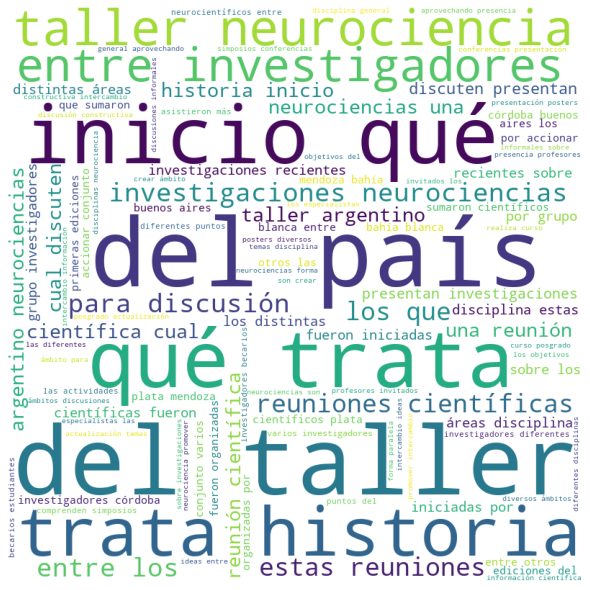

In [3]:
webs = buscar("http://www.neurotaller.com.ar")
cad=""
for www in webs:
    pagina = obtener_html(www[0])
    texto = limpiar(pagina)
    contar(texto)
    #df.head(10)
    #b=0
    for t in texto:
        cad=cad+" "+t
        #if t.find("neurociencia")>-1:
        #    b+=1
    #print(b,"--",www[1])
nube(cad)